# imports

In [48]:
from os import walk
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

from wordcloud import WordCloud

from PIL import Image

# Constants

In [43]:
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'


SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500


WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'

# Reading Email Body From Dataset

In [3]:
def extract_email_body(path):
    
    for root, dirname, filename in walk(path):
        
        for file_name in filename:
            
            filepath = join(root, file_name)
            
            with open(filepath, encoding='latin-1') as file:
    
                flage_is_body = False

                lines = []

                for line in file:

                    if flage_is_body:
                        lines.append(line)

                    elif line == '\n':
                        flage_is_body = True

            file.close()

            email_body = '\n'.join(lines)

            yield file_name, email_body



In [4]:
def make_df_from_directory(path, classification):
    
    rows = []
    row_names = []
    
    for file_name, email_body in extract_email_body(path):
        
        rows.append(
            {'MESSAGE':email_body, 'CATEGORY':classification}
        )
        row_names.append(file_name)
    
    return pd.DataFrame(rows, index=row_names)
    

In [5]:
spam_emails = make_df_from_directory(SPAM_1_PATH, SPAM_CAT)
spam_emails = spam_emails.append(make_df_from_directory(SPAM_2_PATH, SPAM_CAT))
spam_emails

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [6]:
ham_emails = make_df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(make_df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [7]:
data = pd.concat([spam_emails, ham_emails])
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


# Data Cleaning

In [8]:
data['MESSAGE'].isnull().sum()

0

In [9]:
data = data[~(data['MESSAGE'] == '')]

In [10]:
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


# Add IDs (Change Name of Index)

In [11]:
doc_ids = range(0, len(data.index))
data['DOC_ID'] = doc_ids
data

/home/amin/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,MESSAGE,CATEGORY,DOC_ID
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4
...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5792
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5794


In [12]:
data['FILE_NAME'] = data.index
data

/home/amin/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,MESSAGE,CATEGORY,DOC_ID,FILE_NAME
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0,00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5791,01396.61983fbe6ec43f55fd44e30fce24ffa6
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5792,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5793,01398.169b51731fe569f42169ae8f948ec676
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5794,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896


In [13]:
data = data.set_index('DOC_ID')
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


# Visualization

In [14]:
data['CATEGORY'].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [15]:
number_of_spam = data['CATEGORY'].value_counts()[1]
number_of_ham = data['CATEGORY'].value_counts()[0]

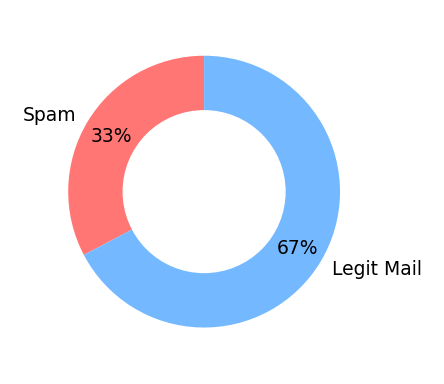

In [16]:
category_names = ['Spam', 'Legit Mail']
size = [number_of_spam, number_of_ham]

custom_colors = ['#ff7675', '#74b9ff']

plt.figure(figsize=(3, 2), dpi=225)
plt.pie(size, labels=category_names, textprops={'fontsize':6}, startangle=90,
       autopct='%1.0f%%', colors=custom_colors, pctdistance=0.8 )

center_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(center_circle)
plt.show()

# NLP

#### Remove html Tag, To Lower, Tokenising, Removing Stop Words,  Stemming, Removing punctuation

## Functions For Email Processing 

In [17]:
def clean_message(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
    
    #Remove HTML tag
    soup = BeautifulSoup(message, 'html.parser')
    clean_text = soup.get_text()
    
    # convert to lower alpha and tokenize message
    words = word_tokenize(clean_text.lower())
    
    filtered_words = []
    
    
    for word in words:
        # Remove stop words and punctuation
        if word not in stop_words and word.isalpha():
            stemmed_word =  stemmer.stem(word)
            filtered_words.append(stemmed_word)
            
            
    return filtered_words

In [18]:
nested_list = data['MESSAGE'].apply(clean_message)
nested_list

/home/amin/anaconda3/envs/py37/lib/python3.7/site-packages/bs4/__init__.py:438: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5796, dtype: object

In [19]:
doc_ids_spam = data[data['CATEGORY'] == 1].index
doc_ids_ham = data[data['CATEGORY'] == 0].index

In [20]:
nested_list_spam = nested_list.loc[doc_ids_spam]
nested_list_ham = nested_list.loc[doc_ids_ham]

In [21]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()
normal_words.shape

(20814,)

# Word Cloud

In [22]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spamy_words = pd.Series(flat_list_spam).value_counts()
spamy_words.shape

(13241,)

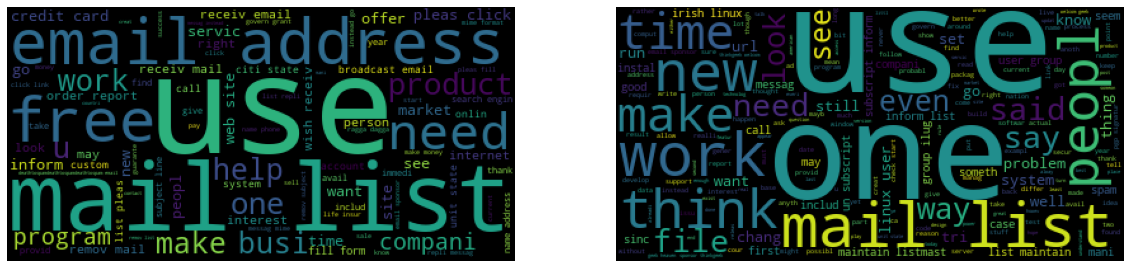

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
word_cloud = WordCloud().generate(" ".join(flat_list_spam))
plt.imshow(word_cloud)
plt.axis('off')

plt.subplot(1, 2, 2)
word_cloud = WordCloud().generate(" ".join(flat_list_ham))
plt.imshow(word_cloud)
plt.axis('off')

plt.show()

# Generate vocabulary


In [37]:
nested_list = data['MESSAGE'].apply(clean_message)
flat_nested_list = [item for sublist in nested_list for item in sublist]

/home/amin/anaconda3/envs/py37/lib/python3.7/site-packages/bs4/__init__.py:438: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [38]:
unique_words = pd.Series(flat_nested_list).value_counts()
unique_words

http        10660
use          5019
list         4851
email        4367
get          4200
            ...  
zarzycki        1
stw             1
canyon          1
wmv             1
oreilli         1
Length: 27332, dtype: int64

In [41]:
frequent_words = unique_words[0:VOCAB_SIZE]
frequent_words[:10]

http     10660
use       5019
list      4851
email     4367
get       4200
mail      3983
one       3907
free      3202
time      3042
work      2883
dtype: int64

# Frequent Word Vocabulary

In [42]:
word_ids = range(0, VOCAB_SIZE)
vocab = pd.DataFrame({'VOCAB_WORD':frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get


In [44]:
vocab.to_csv(WORD_ID_FILE, index=vocab.index.name, header=vocab.VOCAB_WORD.name)